In [293]:
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

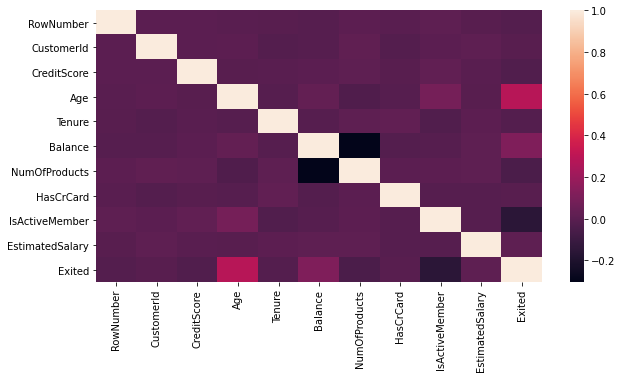

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(), ax=ax);

In [8]:
df = pd.get_dummies(data=df,columns=['Geography', 'Gender'])

In [9]:
df_cleaned = df.drop(['RowNumber','CustomerId','Surname'], axis =1)
df_cleaned

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [10]:
X = df_cleaned.drop('Exited',axis = 1)
y = df_cleaned['Exited']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [289]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [290]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

### Решающее дерево 

In [306]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

In [268]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.8376084417751084

In [117]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



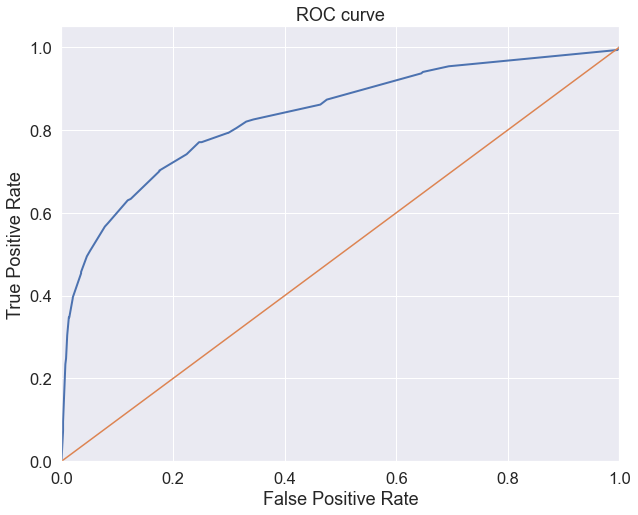

In [120]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_Decision_Tree.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

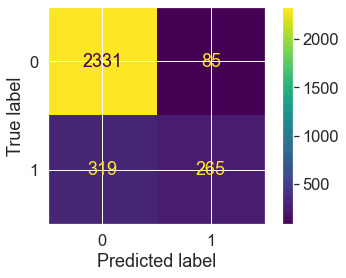

In [131]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_Decision_Tree.eps")

### Метод k-ближайших соседей

In [300]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

0.1296689510345459

In [139]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.5373320982264356

In [140]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2416
           1       0.25      0.09      0.14       584

    accuracy                           0.77      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.70      0.77      0.73      3000



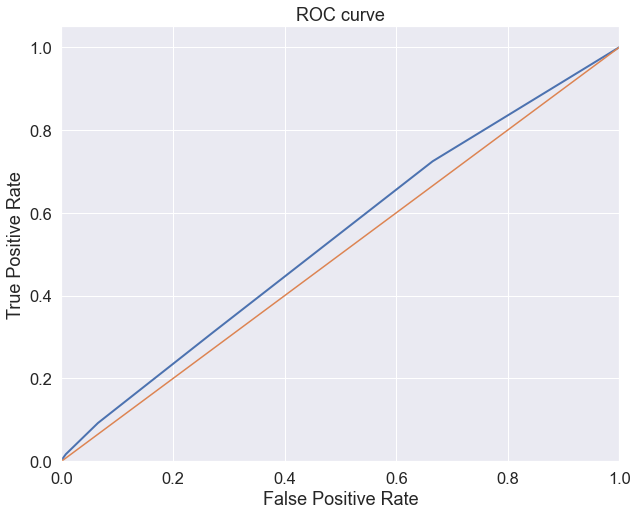

In [143]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_KNN.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

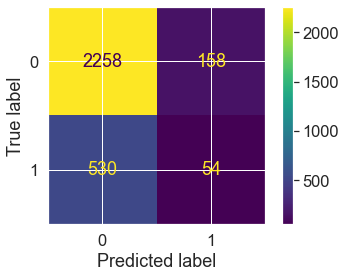

In [145]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_KNN.eps")

### Случайный лес

In [301]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

0.7031049728393555

In [147]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.8541465855483988

In [148]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



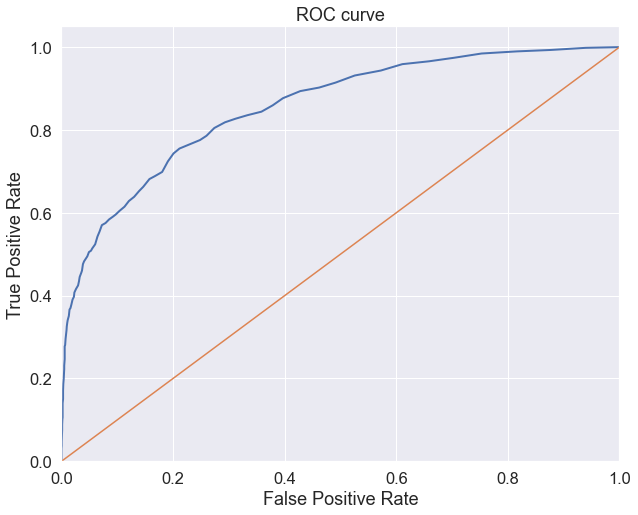

In [154]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_RF.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

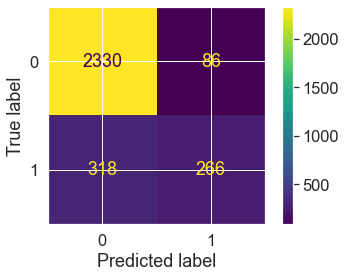

In [155]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_RF.eps")

### Логистическая регрессия

In [307]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

In [169]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.6656571770389187

In [170]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      2416
           1       0.44      0.08      0.14       584

    accuracy                           0.80      3000
   macro avg       0.63      0.53      0.51      3000
weighted avg       0.74      0.80      0.74      3000



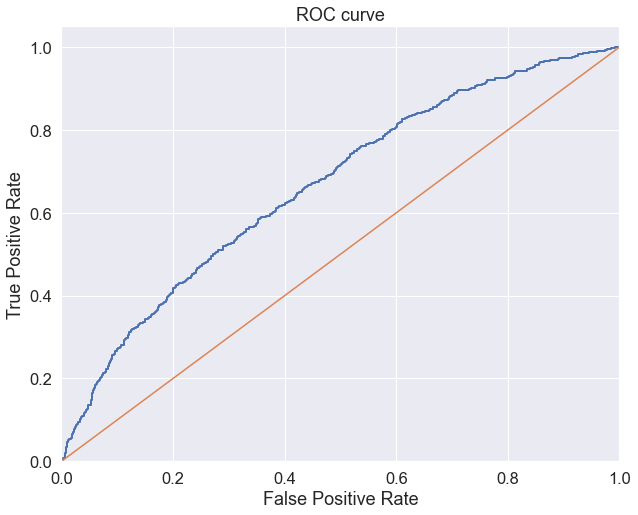

In [164]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_LR.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

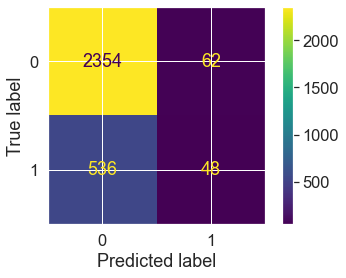

In [167]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_LR.eps")

### Метод опорных векторов

In [308]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

In [179]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.5350035153769391

In [180]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



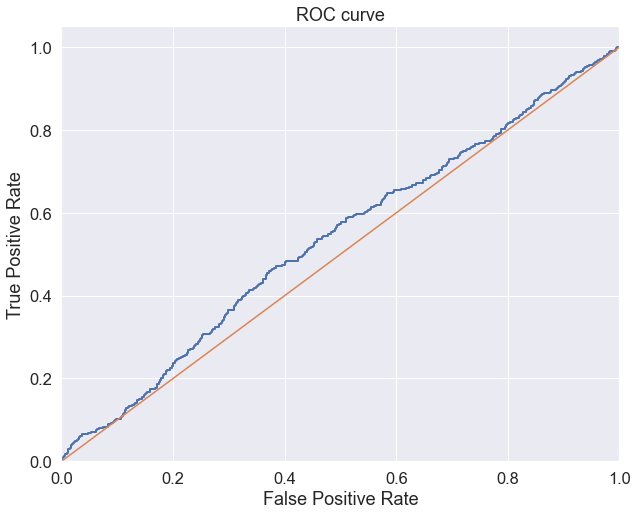

In [174]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_SVC.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

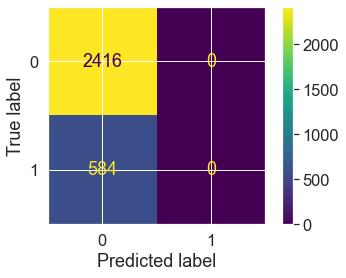

In [175]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_SVC.eps")

### Многослойный перцептрон

In [303]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

0.3514111042022705

In [192]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.6138018234600382

In [193]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.93      0.11      0.19      2416
           1       0.21      0.97      0.34       584

    accuracy                           0.27      3000
   macro avg       0.57      0.54      0.27      3000
weighted avg       0.79      0.27      0.22      3000



In [88]:
params = {'hidden_layer_sizes': [(i,) for i in range(50,60)],
          'activation' : ['logistic', 'relu', 'tanh'],
          'solver': ['lbfgs', 'sgd', 'adam']}

grid_clf = GridSearchCV(clf, params, scoring='roc_auc')
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (59,), 'solver': 'lbfgs'}

In [89]:
roc_auc_score(y_test, grid_clf.best_estimator_.predict_proba(X_test)[:,1])

0.5814387388868729

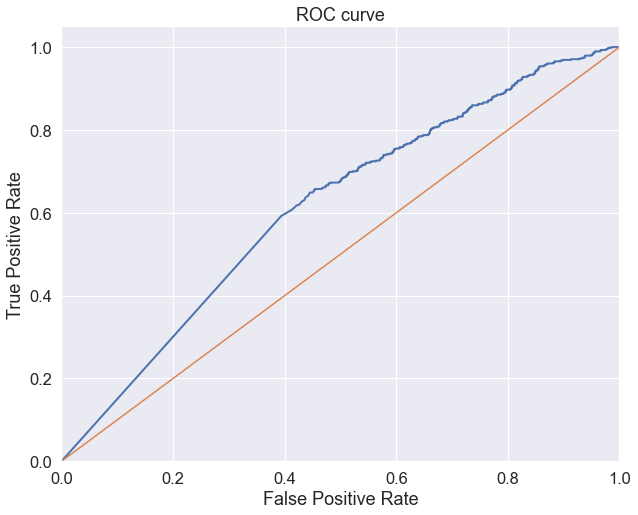

In [195]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_MLP.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

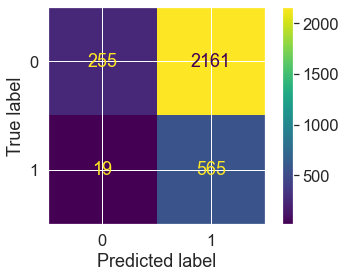

In [194]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_MLP.eps")

### Градиентный бустинг

In [304]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

0.781339168548584

In [292]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.8684884020910824

In [271]:
print(classification_report(y_test, test_res))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1368
           1       0.75      0.46      0.57       333

    accuracy                           0.86      1701
   macro avg       0.81      0.71      0.75      1701
weighted avg       0.85      0.86      0.85      1701



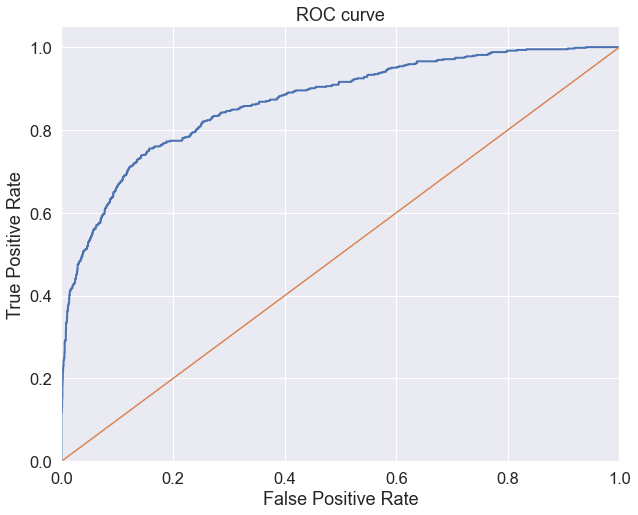

In [206]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_GB.eps")
plt.show()

<Figure size 720x576 with 0 Axes>

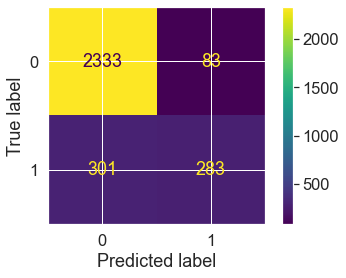

In [205]:
plt.figure(figsize=(10, 8))
plot_confusion_matrix(clf, X_test, y_test);
plt.savefig("CM_GB.eps")

### Усовершенствование GradientBoostingClassifier

In [224]:
np.mean(cross_val_score(GradientBoostingClassifier(), X_train, y_train, cv=5, scoring='accuracy'))

0.8578571428571429

In [285]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
test_res = clf.predict(X_test)

roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.8720902920464324

In [272]:
params = {'loss': ['deviance', 'exponential'],
          'learning_rate' : [i/1000 for i in range(90,100)],
          'subsample': [0.9],
          'n_estimators': range(85, 91),
          'max_features': ['auto', 'log2', 'sqrt', None]}

grid_clf = GridSearchCV(clf, params, scoring='roc_auc')
grid_clf.fit(X_train_scaled, y_train)
grid_clf.best_params_

{'learning_rate': 0.096,
 'loss': 'deviance',
 'max_features': 'auto',
 'n_estimators': 87,
 'subsample': 0.9}

In [274]:
roc_auc_score(y_test, grid_clf.best_estimator_.predict_proba(X_test_scaled)[:,1])

0.8731944663962208

In [277]:
grid_clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.096, max_features='auto',
                           n_estimators=87, subsample=0.9)

In [279]:
clf.feature_importances_

array([0.01900018, 0.38869749, 0.00379139, 0.0859653 , 0.29760804,
       0.00063747, 0.11854386, 0.02216692, 0.00175779, 0.04812329,
       0.        , 0.0082492 , 0.00545907])

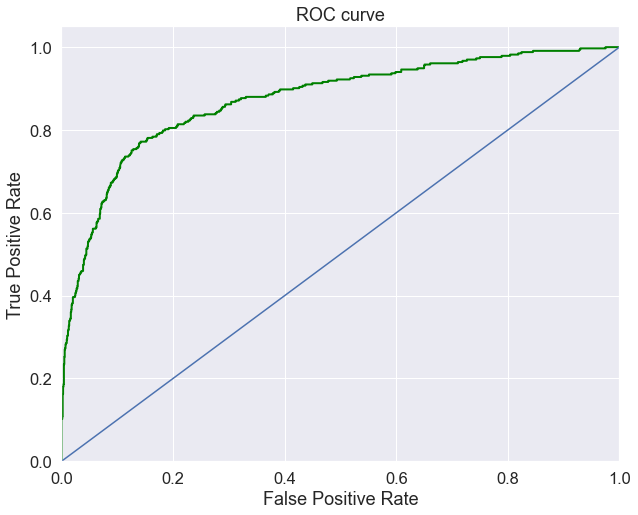

In [287]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, grid_clf.best_estimator_.predict_proba(X_test_scaled)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ', color='green')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC_GB_mod.eps")
plt.show()